In [140]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the URL with the limit parameter to get data for the year 2022
fgi_url = 'https://api.alternative.me/fng/?limit=365'
response = requests.get(fgi_url)
response_json = response.json()

# Create a list with the data of the index for the year 2022
fg_index_list = response_json['data']

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(fg_index_list)

# Convert the timestamp to "yyyy-mm-dd" format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d')
df.set_index('timestamp', inplace=True)

# Convert the 'value' column to a numeric data type (float)
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Divide the 'value' column by 100
df['value'] = df['value'] / 100


df

C:\Users\amanl\AppData\Local\Temp\ipykernel_23236\4289611367.py:17: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d')


,value,value_classification,time_until_update
timestamp,,,
2023-11-09,0.69,Greed,85798
2023-11-08,0.66,Greed,NaN
2023-11-07,0.68,Greed,NaN
2023-11-06,0.74,Greed,NaN
2023-11-05,0.70,Greed,NaN
...,...,...,...
2022-11-14,0.24,Extreme Fear,NaN
2022-11-13,0.22,Extreme Fear,NaN
2022-11-12,0.21,Extreme Fear,NaN


<Axes: title={'center': 'Bitcoin Fear & Greed Index for 2022'}, xlabel='Date', ylabel='Fear & Greed Index (%)'>

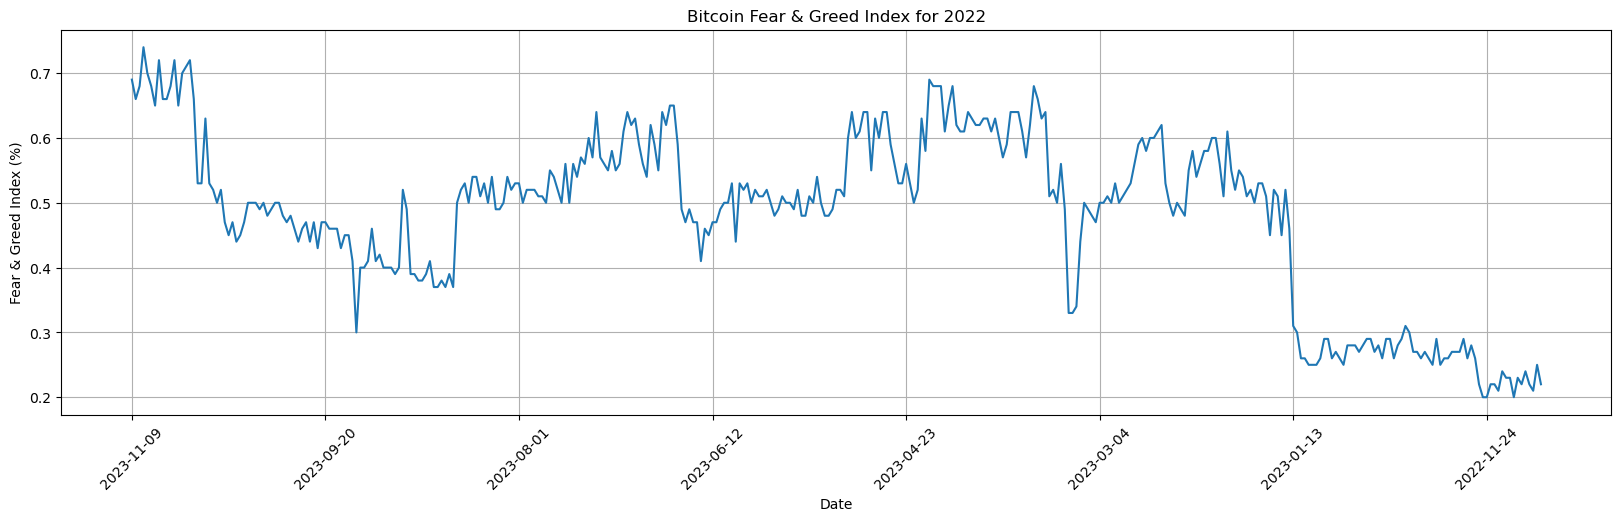

In [154]:
# Plot the data using .plot() method
ax = df['value'].plot(
    figsize=(20, 5),
    xlabel ='Date',
    ylabel = 'Fear & Greed Index (%)',
    title ='Bitcoin Fear & Greed Index for 2022',
    rot= 45,
    grid=True
)


# Show the plot
ax

In [159]:
bear_bull_data = pd.read_csv(Path("Resources/sentiment.csv"))
bear_bull_data = bear_bull_data.set_index('Date')
display(bear_bull_data)

,Bullish,Neutral,Bearish,Total,Mov Avg,Spread,Average,#NAME?,#NAME?.1,High,Low,Close
Date,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/26/1987,NaN,NaN,NaN,NaN,NaN,NaN,37.50%,47.60%,27.40%,NaN,NaN,NaN
7/17/1987,NaN,NaN,NaN,NaN,NaN,NaN,37.50%,47.60%,27.40%,314.59,307.63,314.59
7/24/1987,36.00%,50.00%,14.00%,100%,NaN,22.00%,37.50%,47.60%,27.40%,311.39,307.81,309.27
7/31/1987,26.00%,48.00%,26.00%,100%,NaN,0.00%,37.50%,47.60%,27.40%,318.66,310.65,318.66
...,...,...,...,...,...,...,...,...,...,...,...,...
Count '18,52,52,52,NaN,52,52,NaN,NaN,NaN,52,52,52
Count '19,52,52,52,NaN,52,52,NaN,NaN,NaN,52,52,52
Count '20,53,53,53,NaN,53,53,NaN,NaN,NaN,53,53,53


In [160]:
bear_bull_data = bear_bull_data.dropna()

bear_bull_data

,Bullish,Neutral,Bearish,Total,Mov Avg,Spread,Average,#NAME?,#NAME?.1,High,Low,Close
Date,,,,,,,,,,,,
9/11/1987,50.00%,23.00%,27.00%,100%,46.63%,23.00%,37.50%,47.60%,27.40%,321.98,313.56,321.98
9/18/1987,60.00%,29.00%,11.00%,100%,49.63%,49.00%,37.50%,47.60%,27.40%,323.08,314.86,314.86
9/25/1987,53.00%,17.00%,30.00%,100%,53.00%,23.00%,37.50%,47.60%,27.40%,321.19,310.54,320.16
10/2/1987,44.00%,26.00%,30.00%,100%,51.50%,14.00%,37.50%,47.60%,27.40%,328.07,321.69,328.07
10/9/1987,46.00%,39.00%,15.00%,100%,51.63%,31.00%,37.50%,47.60%,27.40%,328.08,311.07,311.07
...,...,...,...,...,...,...,...,...,...,...,...,...
10/5/2023,30.10%,28.32%,41.58%,100%,33.38%,-11.50%,37.50%,47.60%,27.40%,"4,333.15","4,216.45","4,263.75"
10/12/2023,40.00%,23.51%,36.49%,100%,33.89%,3.50%,37.50%,47.60%,27.40%,"4,385.46","4,219.55","4,376.95"
10/19/2023,34.07%,31.32%,34.62%,100%,34.12%,-0.50%,37.50%,47.60%,27.40%,"4,393.57","4,303.84","4,314.60"


In [161]:
columns_to_drop = ['Total', 'Mov Avg', 'Spread', 'Average', '#NAME?','#NAME?.1', 'High', 'Low']
bear_bull_data = bear_bull_data.drop(columns_to_drop, axis=1)

bear_bull_data

,Bullish,Neutral,Bearish,Close
Date,,,,
9/11/1987,50.00%,23.00%,27.00%,321.98
9/18/1987,60.00%,29.00%,11.00%,314.86
9/25/1987,53.00%,17.00%,30.00%,320.16
10/2/1987,44.00%,26.00%,30.00%,328.07
10/9/1987,46.00%,39.00%,15.00%,311.07
...,...,...,...,...
10/5/2023,30.10%,28.32%,41.58%,"4,263.75"
10/12/2023,40.00%,23.51%,36.49%,"4,376.95"
10/19/2023,34.07%,31.32%,34.62%,"4,314.60"
